**05 October 2020**

# Classification

## Admin

* Problem set 5 due Tuesday night by 11:59pm
* Response to Mauch et al. or Norvig due by 9:00pm Tuesday, unless you've already submitted two (or more) responses.
* I've posted links to a couple of useful [machine learning glossaries on Campuswire](https://campuswire.com/c/G279E2961/feed/127).

## Repeat: Supervised and unsupervised learning

* "Clustering" is a type of *unsupervised* learning
* "Classification" is a type of *supervised* learning
* **Both seek to assign a finite set of labels to input objects on the basis of features associated with those objects**
* In *supervised* learning, you know the labels in advance
    * You supply a set of (correctly) labeled objects to the algorithm
    * The algorithm then "learns" which features are associated with which labels, so as to minimize classification errors
* In *unsupervised* learning, you don't know the labels (though you might know how many labels there should be)
    * You supply a feature matrix and a definition of what a "good" clustering (label set) should be
    * The algorithm then assigns labels to the input objects so as to best satisfy the supplied definition of "good" (typically, minimizing variance within clusters and maximizing difference between clusters)

## Repeat: Why prefer one or the other?

* Unsupervised methods are often used early in a project, when you're looking for unknown stucture in your data
    * Unsupervised methods are your only option if you don't know what the appropriate set of labels might be for your data set
    * Also appropriate if you don't have (many) labeled instances
    * Unsupervised methods are typically "cheap" to set up, but costly to evaluate
* Supervised methods require you to know in advance the full set of appropriate labels for your data
    * Supervised methods often have high initial costs, but are easier to evaluate (because you already have a set of correctly labeled instances that you can use for validation).

## Classification boundaries (a.k.a. decision boundaries)

<img src="./images/svm.svg" width="300px">

## An artificial example

Let's try this with 3 synthetic blobs and then switch to 4 ...

**NB.** We use the `make_blobs` function to create synthetic data for purposes of illustration. This has no role in actual clustering on classification problems. Don't try to use `make_blobs` as part of your approach to learning from real data.

kNN score (uniform density): 0.8713333333333333
kNN score (varied density): 0.758


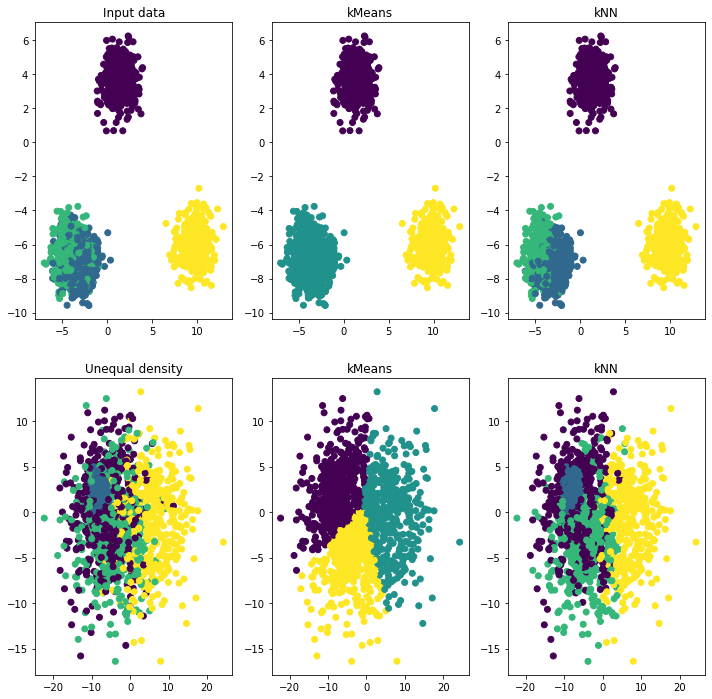

In [19]:
# kMeans and kNN on articial data
# Adapted from sklearn examples

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
n_blobs=4
X, y = make_blobs(n_samples=n_samples, centers=n_blobs)

# Input data

plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Input data")

# Clustering
y_pred = KMeans(n_clusters=3).fit_predict(X)

plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("kMeans")


# Classification
y_pred = KNeighborsClassifier(n_neighbors=5).fit(X, y).predict(X)
print("kNN score (uniform density):", KNeighborsClassifier(n_neighbors=5).fit(X, y).score(X,y))

plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("kNN")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples, centers=n_blobs,
                                cluster_std=np.random.choice([1.0, 5.0, 2.0], size=n_blobs, replace=True))

plt.subplot(234)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
plt.title("Unequal density")

y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.subplot(235)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("kMeans")

y_pred = KNeighborsClassifier(n_neighbors=5).fit(X_varied, y_varied).predict(X_varied)
print("kNN score (varied density):", KNeighborsClassifier(n_neighbors=5).fit(X_varied, y_varied).score(X_varied, y_varied))

plt.subplot(236)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("kNN")


plt.show()

**NB.** The classifier performance above is artificially good, because we've trained on the full data set, then tested over the same data set. This isn't how you'd evaluate real-world performance! Cf. test-train split (or dev-test-train split) and cross validation (repeated, different splits).

## Algorithms

### *k* Nearest Neighbors
* Assign to new objects the most common label among *k* nearest neighbors in the training set

### Decision tree
* Select features that best split the training data, in descending order
<img src="./images/Decision_Tree.jpg">
* Theft in Old Bailey cases
<img src="./images/example_tree.png">

### Random forest
* Create many different decision trees trained on different subsets of your data
* Class label by majority vote of the different trees

### Logistic regression
* Fit training data to a linear model: $z = W_0 + W_1 x_1 + W_2 x_2 + ...$
    * Note that values of $z$ can range from -infinity to + infinity
* Transform the linear value into a score between 0 and 1 using the sigmoid function: $$\sigma(t) = \frac{1}{1 + e^{-z}}$$
* Sigmoid function looks like this:
    
<img src="./images/sigmoid.png">
* Now we can set the empirically best value of the sigmoid function to discriminate between the classes

### Naïve Bayes
* $p(C|x_1 , ..., x_n) = p(C)\prod_{i=1}^{n} p(x_i | C)$
* Read: "The probability of class $C$ given the values in vector $x$ equals the underlying probability of class $C$ times the probabilities of those feature values given class $C$."
* $x_i$ is the value of feature $i$ in the vector $x$
* The latter part -- the underlying proabability of class $C$ and the probability of the feature values given class $C$ -- is what you learn from your training data.
* You can then assign class labels in your test set on the basis of the class with the highest predicted probability given the evidence.
* Note difference between Gaussian and Multinomial NB: Gaussian is for use with continuous variables; multinomial is used with dicreet variables (like word counts).

### SVM
* A linear (by default) method based on finding the line or plane that separates classes with maximum margin.
    * Think of this as a line of "worst fit," in contrast to the line of best fit for a regression model.
    * The *support vectors* are the objects closest to the decision boundary, i.e., those that would *change* the boundary if they were removed.
* Can be extended to nonlinear hyperplanes via kernel functions.
    * A kernel function maps input points to a higher-dimensional space in which the inputs *are* linearly separable.
* A classic approach to text classification (developed in the 1990s).